# 국토교통부 아파트 매매 및 전월세 실거래가 조회하기

In [1]:
import os
os.getcwd()
os.chdir('C:/Users/pmj03/likelion') #절대 경로 설정

 ## 라이브러리 불러오기

In [12]:
import pandas as pd
import requests
import datetime
from bs4 import BeautifulSoup as bs
import time
from time import strftime
import xml.etree.ElementTree as ET

# 시각화를 위한 라이브러리
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

## 쿼리 값 세팅
- 지역코드 참고 : https://github.com/drtagkim/kor_gg_code/blob/master/region_code5.csv

In [39]:
#인증키
service_key = '%2BYVsKRNTx5iyEGoMkPbKjm0GNtP%2FoVkw1hPT256CxVJi0CBBIiNdWvCiqxdPMzHcSi2GW%2FQdYVy8F7Km43fEpQ%3D%3D'
#실거래자료의 년월
ymd = '202201'
#지역코드 - 경기도 성남시 분당구
geo_code='41135'
#페이지당 행의 개수
numrow = 1000


## url 세팅

In [40]:
url = f'http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTradeDev?'
url = f'{url}LAWD_CD={geo_code}&DEAL_YMD={ymd}&serviceKey={service_key}&numOfRows={numrow}'

## GET OK 200 확인

In [42]:
response = requests.get(url)
print(response)

<Response [200]>


## Columns 매핑

In [43]:
result = bs(response.text, features='xml')
items = result.findAll('item')

# 컬럼명 찾기
columns = items[0].find_all()
columns[0].name

cols = []

for i in range(0, len(columns)):
    cols.append(columns[i].name)

print(cols)

['거래금액', '거래유형', '건축년도', '년', '도로명', '도로명건물본번호코드', '도로명건물부번호코드', '도로명시군구코드', '도로명일련번호코드', '도로명지상지하코드', '도로명코드', '법정동', '법정동본번코드', '법정동부번코드', '법정동시군구코드', '법정동읍면동코드', '법정동지번코드', '아파트', '월', '일', '일련번호', '전용면적', '중개사소재지', '지번', '지역코드', '층', '해제사유발생일', '해제여부']


In [70]:
col_list = [
    '지역코드',
    '도로명',
    '법정동',
    '지번',
    '아파트',
    '건축년도',
    '층',
    '전용면적',
    '년',
    '월',
    '일',
    '거래금액',
    '도로명건물본번호코드',
    '도로명시군구코드',
    '도로명코드',
    '법정동본번코드',
    '법정동시군구코드',
    '거래유형',
    '중개사소재지'
]

## 한 페이지 내용을 가져오는 함수 (특정 달의 내용을 크롤링) - 혜원님 code를 사용하여 진행


In [54]:
def get_data(geo_code,ymd):
    url = f'http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTradeDev?'
    url = f'{url}LAWD_CD={geo_code}&DEAL_YMD={ymd}&serviceKey={service_key}&numOfRows={numrow}'
    
    response = requests.get(url)
    result = bs(response.text, features='xml')
    items = result.findAll('item')

    # 컬럼명 찾기
    columns = items[0].find_all()
    columns[0].name

    cols = []

    for i in range(0, len(columns)):
        cols.append(columns[i].name)
    
    
    # 문서내 모든 텍스트 가져오기
    all_txt = []

    for c in range(0,len(cols)):
        col = cols[c]
        for a in result.select(col):
            all_txt.append(a.text.strip())
            
    # 개별 거래내역별로 묶기
    sorted_txt = []

    for i in range(len(result.items)):
        temp = []
        a = list(range(i, len(all_txt), len(result.items)))
        for j in a:
            temp.append(all_txt[j])
        sorted_txt.append(temp)
    
    
    
    df = pd.DataFrame(sorted_txt, columns = cols)
    return df

In [55]:
get_data(geo_code,ymd)

,거래금액,거래유형,건축년도,년,도로명,도로명건물본번호코드,도로명건물부번호코드,도로명시군구코드,도로명일련번호코드,도로명지상지하코드,...,월,일,일련번호,전용면적,중개사소재지,지번,지역코드,층,해제사유발생일,해제여부
0,"110,500",중개거래,1993,2022,장안로51번길,00011,00000,41135,01,0,...,1,5,41135-73,42.56,,24,41135,5,,
1,"98,500",중개거래,1994,2022,수내로,00181,00000,41135,01,0,...,1,5,41135-79,59.78,경기 성남분당구,73,41135,1,,
2,"136,000",중개거래,1993,2022,내정로174번길,00042,00000,41135,01,0,...,1,10,41135-78,131.4,경기 성남분당구,71,41135,3,,
3,"63,000",직거래,1992,2022,내정로165번길,00035,00000,41135,01,0,...,1,13,41135-73,28.16,경기 성남분당구,24,41135,2,,
4,"92,000",중개거래,1992,2022,수내로,00206,00000,41135,02,0,...,1,15,41135-76,131.49,"경기 성남분당구, 서울 서초구",54,41135,8,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,"122,000",중개거래,1995,2022,미금일로,00058,00000,41135,03,0,...,1,26,41135-219,101.82,경기 성남분당구,225,41135,2,,
87,"94,000",중개거래,1995,2022,미금일로,00022,00000,41135,03,0,...,1,4,41135-457,55.44,경기 성남분당구,921,41135,9,,
88,"99,000",중개거래,1995,2022,미금일로,00022,00000,41135,03,4340382,...,12,41135-32,85,경기 성남분당구,66,41135,5,,,None
89,"102,000",중개거래,1995,2022,구미로,00115,00000,41135,01,3180039,...,21,41135-21,57.28,경기 성남분당구,38,41135,12,,,None


## 모든 데이터 내용을 가져오는 함수
- 경기도 성남시 분당구의 2022.01~ 2022.12 데이터수집
- 년도를 입력받으면 해당년도의 아파트 실거래가 정보 출력하는 함수
- 참고자료 
    - https://ai-creator.tistory.com/24

In [56]:
# 앞의 한달 데이터를 수집하는 함수인 get_data가 선행되어야 한다.

def get_all_data(geo_code,date_year):
    #년도를 입력받으면 년도+월 리스트 만들기
    year = [str("%02d" %(y)) for y in range(date_year, date_year + 1)]
    month = [str("%02d" %(m)) for m in range(1, 13)]
    base_date_list = ["%s%s" %(y, m) for y in year for m in month ]
    
    # 날짜 리스트에 있는 날짜값들을 순차적으로 get_data 함수에 대입하기
    items_list = []
    for base_date in base_date_list:
        df_one = get_data(geo_code, base_date)
        items_list += (df_one.values.tolist())
        time.sleep(0.01)
    
    # 얻어진 리스트를 데이터프레임으로 만들기
    df_result = pd.DataFrame(items_list,columns = df_one.columns)
    return df_result


In [57]:
date_year = 2022
df = get_all_data(geo_code,date_year)
df

,거래금액,거래유형,건축년도,년,도로명,도로명건물본번호코드,도로명건물부번호코드,도로명시군구코드,도로명일련번호코드,도로명지상지하코드,...,월,일,일련번호,전용면적,중개사소재지,지번,지역코드,층,해제사유발생일,해제여부
0,"110,500",중개거래,1993,2022,장안로51번길,00011,00000,41135,01,0,...,1,5,41135-73,42.56,,24,41135,5,,
1,"98,500",중개거래,1994,2022,수내로,00181,00000,41135,01,0,...,1,5,41135-79,59.78,경기 성남분당구,73,41135,1,,
2,"136,000",중개거래,1993,2022,내정로174번길,00042,00000,41135,01,0,...,1,10,41135-78,131.4,경기 성남분당구,71,41135,3,,
3,"63,000",직거래,1992,2022,내정로165번길,00035,00000,41135,01,0,...,1,13,41135-73,28.16,경기 성남분당구,24,41135,2,,
4,"92,000",중개거래,1992,2022,수내로,00206,00000,41135,02,0,...,1,15,41135-76,131.49,"경기 성남분당구, 서울 서초구",54,41135,8,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,"87,500",중개거래,2008,2022,산운로,00098,00000,41135,01,0,...,12,10,41135-466,59.9,경기 성남분당구,922,41135,5,22.12.20,O
1087,"113,000",중개거래,2010,2022,판교원로82번길,00030,00000,41135,01,0,...,12,10,41135-466,59.9,경기 성남분당구,922,41135,5,,
1088,"100,000",중개거래,2009,2022,판교원로,00068,00000,41135,02,0,...,12,23,41135-456,101.25,경기 성남분당구,916,41135,10,,
1089,"100,000",중개거래,2009,2022,판교원로,00068,00000,41135,02,3180026,...,3,41135-18,84.82,,35,41135,13,,,None


### (추가) PublicDataReader을 이용하여 불러온 데이터와 차이가 있는 지 확인해보기

In [64]:
# PublicDataReader 설치하기
!pip install PublicDataReader

# API 키를 발급받고 PublicDataReader 라이브러리에서 TransactionPrice라는 클래스를 가져온다.
from PublicDataReader import TransactionPrice
api = TransactionPrice(service_key)

# 분석할 지역인 '경기도 성남시 분당구'의 시군코드를 알아본다.
import PublicDataReader as pdr
sigungu_name = "분당구"
code = pdr.code_bdong()
code.loc[(code['시군구명'].str.contains(sigungu_name, na=False)) &
         (code['읍면동명'].isna())]

# 2022년 1년동안 경기도 성남시 분당구의 아파트 매매 데이터를 불러오기
df_sale = api.get_data(
    property_type="아파트",
    trade_type="매매",
    sigungu_code="41135",
    start_year_month = "202201",
    end_year_month="202212"
    )

df_sale.shape #(1091,28) -> 행과 열의 개수가 위와 동일함

(1091, 28)

In [65]:
df_sale.head() #컬럼의 순서만 다를뿐 같게 나오는 걸 확인해볼 수 있다.

,지역코드,도로명,법정동,지번,아파트,건축년도,층,전용면적,년,월,...,법정동본번코드,법정동부번코드,법정동시군구코드,법정동읍면동코드,법정동지번코드,일련번호,거래유형,중개사소재지,해제사유발생일,해제여부
0,41135,장안로51번길,분당동,66,장안타운(건영),1993,5,85.00,2022,1,...,0066,0000,41135,10100,1,41135-32,중개거래,경기 성남분당구,None,None
1,41135,수내로,분당동,38,샛별마을(우방),1994,12,57.28,2022,1,...,0038,0000,41135,10100,1,41135-21,중개거래,경기 성남분당구,None,None
2,41135,내정로174번길,수내동,52,파크타운(서안),1993,7,84.78,2022,1,...,0052,0000,41135,10200,1,41135-77,중개거래,경기 성남분당구,None,None
3,41135,내정로165번길,수내동,24,양지마을(5단지)(한양501-514),1992,5,42.56,2022,1,...,0024,0000,41135,10200,1,41135-73,직거래,None,None,None
4,41135,수내로,수내동,73,푸른마을(신성),1992,1,59.78,2022,1,...,0073,0000,41135,10200,1,41135-79,중개거래,경기 성남분당구,None,None


### (추가) xml.etree을 이용하여 불러온 데이터와 차이가 있는 지 확인해보기

In [66]:
# 한달 데이터만 불러오기

def get_data2(geo_code,ymd):
    url = f'http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTradeDev?'
    url = f'{url}LAWD_CD={geo_code}&DEAL_YMD={ymd}&serviceKey={service_key}&numOfRows={numrow}'
    
    response = requests.get(url)
    tree = ET.fromstring(response.content)
    items=tree[1][0]
    itemsList =[[i.text for i in item] for item in items]
    columns = [i.tag for i in items[0]]
    
    df= pd.DataFrame(itemsList,columns = columns)
    return df

In [67]:
# 2022년도 분당구 데이터 불러오기


def get_all_data2(geo_code,date_year):
    #년도를 입력받으면 년도+월 리스트 만들기
    year = [str("%02d" %(y)) for y in range(date_year, date_year + 1)]
    month = [str("%02d" %(m)) for m in range(1, 13)]
    base_date_list = ["%s%s" %(y, m) for y in year for m in month ]
    
    # 날짜 리스트에 있는 날짜값들을 순차적으로 get_data 함수에 대입하기
    items_list = []
    for base_date in base_date_list:
        df_one = get_data2(geo_code, base_date)
        items_list += (df_one.values.tolist())
        time.sleep(0.01)
    
    # 얻어진 리스트를 데이터프레임으로 만들기
    df_result = pd.DataFrame(items_list,columns = df_one.columns)
    return df_result

In [68]:
date_year = 2022
df_check = get_all_data2(geo_code,date_year)
df_check

,거래금액,거래유형,건축년도,년,도로명,도로명건물본번호코드,도로명건물부번호코드,도로명시군구코드,도로명일련번호코드,도로명지상지하코드,...,월,일,일련번호,전용면적,중개사소재지,지번,지역코드,층,해제사유발생일,해제여부
0,"110,500",중개거래,1993,2022,장안로51번길,00011,00000,41135,01,0,...,1,12,41135-32,85,경기 성남분당구,66,41135,5,,
1,"98,500",중개거래,1994,2022,수내로,00181,00000,41135,01,0,...,1,21,41135-21,57.28,경기 성남분당구,38,41135,12,,
2,"136,000",중개거래,1993,2022,내정로174번길,00042,00000,41135,01,0,...,1,3,41135-77,84.78,경기 성남분당구,52,41135,7,,
3,"63,000",직거래,1992,2022,내정로165번길,00035,00000,41135,01,0,...,1,5,41135-73,42.56,,24,41135,5,,
4,"92,000",중개거래,1992,2022,수내로,00206,00000,41135,02,0,...,1,5,41135-79,59.78,경기 성남분당구,73,41135,1,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,"87,500",중개거래,2008,2022,산운로,00098,00000,41135,01,0,...,12,3,41135-434,59.612,"경기 성남분당구, 경기 용인기흥구",956,41135,11,,
1087,"113,000",중개거래,2010,2022,판교원로82번길,00030,00000,41135,01,0,...,12,9,41135-477,84.72,경기 성남분당구,918,41135,17,,
1088,"100,000",중개거래,2009,2022,판교원로,00068,00000,41135,02,0,...,12,10,41135-466,59.9,경기 성남분당구,922,41135,5,22.12.20,O
1089,"100,000",중개거래,2009,2022,판교원로,00068,00000,41135,02,0,...,12,10,41135-466,59.9,경기 성남분당구,922,41135,5,,


## csv파일로 저장하고 확인하기

In [59]:
file_name1 ="2022년도 분당구 아파트 매매2.csv"
df.to_csv(file_name1, encoding="utf-8-sig",index = False)

In [60]:
#읽어오기
pd.read_csv(file_name1)

,거래금액,거래유형,건축년도,년,도로명,도로명건물본번호코드,도로명건물부번호코드,도로명시군구코드,도로명일련번호코드,도로명지상지하코드,...,월,일,일련번호,전용면적,중개사소재지,지번,지역코드,층,해제사유발생일,해제여부
0,"110,500",중개거래,1993,2022,장안로51번길,11,0,41135,1,0,...,1,5,41135-73,42.56,NaN,24,41135,5.0,NaN,NaN
1,"98,500",중개거래,1994,2022,수내로,181,0,41135,1,0,...,1,5,41135-79,59.78,경기 성남분당구,73,41135,1.0,NaN,NaN
2,"136,000",중개거래,1993,2022,내정로174번길,42,0,41135,1,0,...,1,10,41135-78,131.4,경기 성남분당구,71,41135,3.0,NaN,NaN
3,"63,000",직거래,1992,2022,내정로165번길,35,0,41135,1,0,...,1,13,41135-73,28.16,경기 성남분당구,24,41135,2.0,NaN,NaN
4,"92,000",중개거래,1992,2022,수내로,206,0,41135,2,0,...,1,15,41135-76,131.49,"경기 성남분당구, 서울 서초구",54,41135,8.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,"87,500",중개거래,2008,2022,산운로,98,0,41135,1,0,...,12,10,41135-466,59.9,경기 성남분당구,922,41135,5.0,22.12.20,O
1087,"113,000",중개거래,2010,2022,판교원로82번길,30,0,41135,1,0,...,12,10,41135-466,59.9,경기 성남분당구,922,41135,5.0,NaN,NaN
1088,"100,000",중개거래,2009,2022,판교원로,68,0,41135,2,0,...,12,23,41135-456,101.25,경기 성남분당구,916,41135,10.0,NaN,NaN
1089,"100,000",중개거래,2009,2022,판교원로,68,0,41135,2,3180026,...,3,41135-18,84.82,NaN,35,41135,13,NaN,NaN,NaN


# 데이터 전처리

## 필요한 컬럼만 추출

In [71]:
# 28개의 columns 중에 19개 columns만 분석에 사용할 예정
df= df[col_list]

## 데이터 타입 변경
- 건축년도, 층, 전용면적, 년, 월, 일, 거래금액 은 int / float형태로 변경해주기
- 일부 행이 한칸씩 당겨져있어 타입 변경시 오류 발생 → 헤결방법을 아직 못찾았습니다..
- 타입 변경을 안하면 뒤에 했던 분석을 못하게 되니 데이터 분석부분은 PublicDataReader로 불러온 자료를 이용하여 실행했습니다.
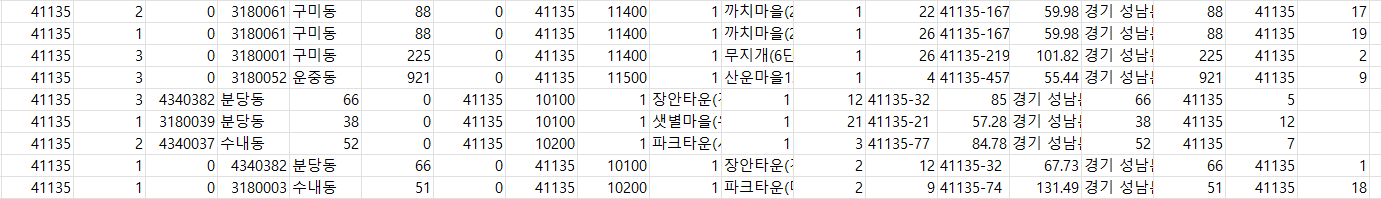

In [74]:
df.거래금액.str.strip().str.replace(",","").astype(int)

0       110500
1        98500
2       136000
3        63000
4        92000
         ...  
1086     87500
1087    113000
1088    100000
1089    100000
1090    134500
Name: 거래금액, Length: 1091, dtype: int32

In [75]:
df.층.str.strip().str.replace(",","").astype(int)

ValueError: invalid literal for int() with base 10: ''

## 데이터 요약

In [76]:
df_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역코드        1091 non-null   object 
 1   도로명         1091 non-null   object 
 2   법정동         1091 non-null   object 
 3   지번          1091 non-null   object 
 4   아파트         1091 non-null   object 
 5   건축년도        1091 non-null   Int64  
 6   층           1091 non-null   Int64  
 7   전용면적        1091 non-null   float64
 8   년           1091 non-null   Int64  
 9   월           1091 non-null   Int64  
 10  일           1091 non-null   Int64  
 11  거래금액        1091 non-null   Int64  
 12  도로명건물본번호코드  1091 non-null   object 
 13  도로명건물부번호코드  1091 non-null   object 
 14  도로명시군구코드    1091 non-null   object 
 15  도로명일련번호코드   1091 non-null   object 
 16  도로명지상지하코드   1066 non-null   object 
 17  도로명코드       1091 non-null   object 
 18  법정동본번코드     1091 non-null   object 
 19  법정동부번코드     1091 non-null  

In [77]:
# 범주형 변수 기초통계
df_sale.describe(include="O")

,지역코드,도로명,법정동,지번,아파트,도로명건물본번호코드,도로명건물부번호코드,도로명시군구코드,도로명일련번호코드,도로명지상지하코드,...,법정동본번코드,법정동부번코드,법정동시군구코드,법정동읍면동코드,법정동지번코드,일련번호,거래유형,중개사소재지,해제사유발생일,해제여부
count,1091,1091,1091,1091,1091,1091,1091,1091,1091,1066,...,1091,1091,1091,1091,1091,1091,1091,1028,33,33
unique,1,56,13,133,170,123,2,1,5,1,...,132,4,1,13,2,170,2,34,31,1
top,41135,중앙공원로,정자동,91,시범한양,00017,00000,41135,01,0,...,0091,0000,41135,10300,1,41135-103,중개거래,경기 성남분당구,22.08.29,O
freq,1091,102,237,53,53,67,1088,1091,655,1066,...,53,1068,1091,237,1089,53,1029,935,2,33


In [78]:
# 수치형 변수 기초통계
df_sale.describe()

,건축년도,층,전용면적,년,월,일,거래금액
count,1091.0,1091.0,1091.000000,1091.0,1091.0,1091.0,1091.0
mean,1995.935839,9.358387,84.438366,2022.0,4.716774,15.298808,124687.106324
std,6.067775,6.117419,40.886161,0.0,2.820222,8.460626,53855.281861
min,1991.0,1.0,28.160000,2022.0,1.0,1.0,38000.0
25%,1992.0,5.0,53.600000,2022.0,3.0,8.0,82000.0
50%,1994.0,9.0,83.330000,2022.0,4.0,16.0,118000.0
75%,1995.0,13.0,102.977450,2022.0,5.0,22.0,154000.0
max,2021.0,33.0,244.700000,2022.0,12.0,31.0,490000.0


<function matplotlib.pyplot.show(close=None, block=None)>

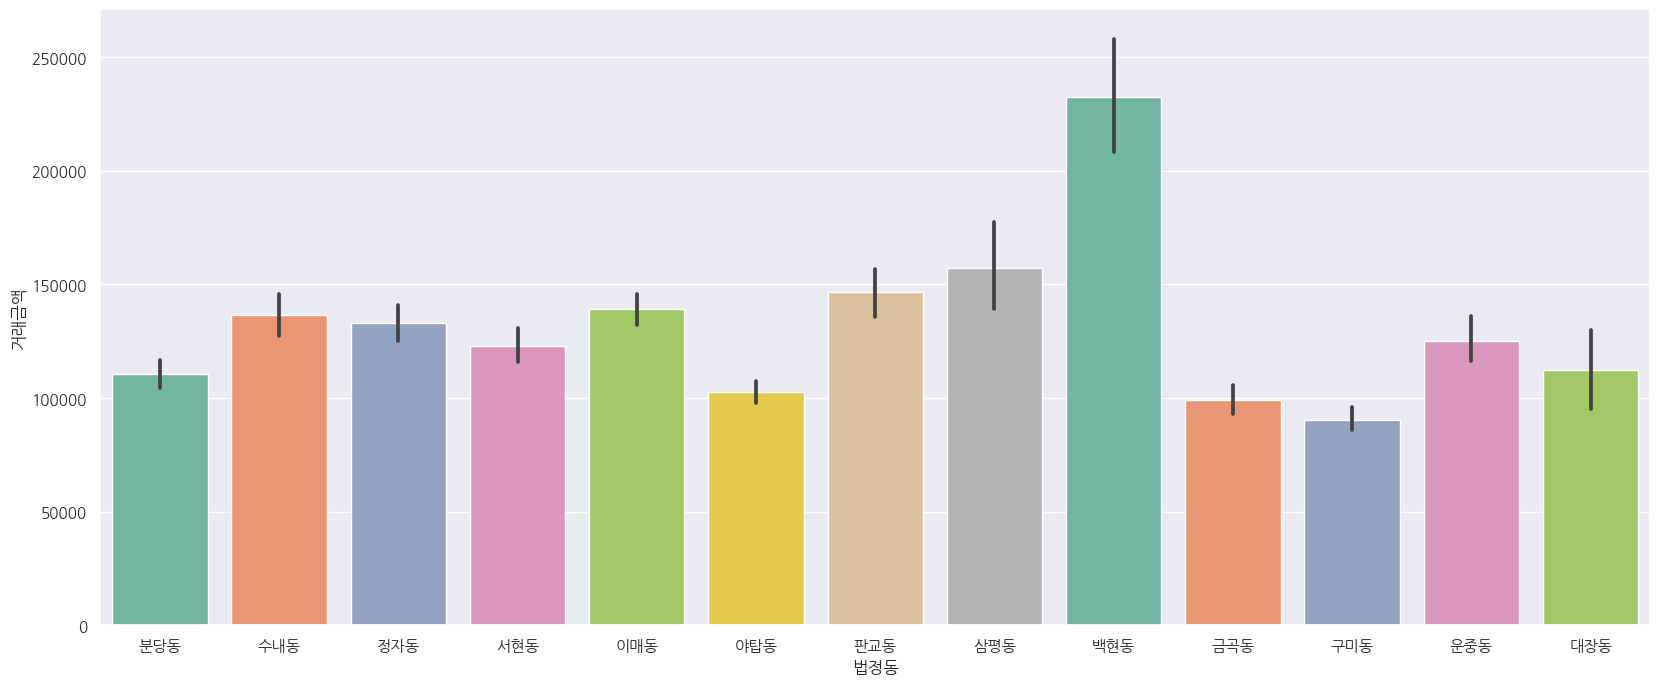

In [84]:
# 법정동 기준 아파트 매매가의 중위값 비교 
%matplotlib inline 

plt.figure(figsize=(20,8))
sns.set_style('darkgrid')
plt.rc('font', family='Nanumgothic')

sns.barplot(data=df_sale, x="법정동" , y ='거래금액', palette='Set2')
plt.show

## 결측값 확인

In [85]:
# 코드 결과 : 도로명지상지하코드, 중개사소재지,해제사유발생일, 해제여부에 결측값 존재
# 아직 분석방향을 확실히 정하지 못했으므로 함부로 제거하거나 치환하지 않는다.
pd.DataFrame(df_sale.isnull().sum())

,0
지역코드,0
도로명,0
법정동,0
지번,0
아파트,0
건축년도,0
층,0
전용면적,0
년,0
월,0


## 중복값 확인

In [86]:
# 각 컬럼별 중복값의 개수
# 분당구의 데이터이므로 지역과 관련된 변수는 다 중복된다.
duple_col = list(df_sale.columns)

for i in range(len(df_sale.columns)):
    print({duple_col[i]: df_sale[list(df_sale.columns)[i]].duplicated().sum()})

{'지역코드': 1090}
{'도로명': 1035}
{'법정동': 1078}
{'지번': 958}
{'아파트': 921}
{'건축년도': 1073}
{'층': 1059}
{'전용면적': 774}
{'년': 1090}
{'월': 1079}
{'일': 1060}
{'거래금액': 714}
{'도로명건물본번호코드': 968}
{'도로명건물부번호코드': 1089}
{'도로명시군구코드': 1090}
{'도로명일련번호코드': 1086}
{'도로명지상지하코드': 1089}
{'도로명코드': 1035}
{'법정동본번코드': 959}
{'법정동부번코드': 1087}
{'법정동시군구코드': 1090}
{'법정동읍면동코드': 1078}
{'법정동지번코드': 1089}
{'일련번호': 921}
{'거래유형': 1089}
{'중개사소재지': 1056}
{'해제사유발생일': 1059}
{'해제여부': 1089}


## 매매 거래금액 이상치 확인
- 여러 수치형 변수 중에 평균과의 차이가 가장 궁금한 변수는 거래금액이므로 IQR을 이용하여 이상치를 확인한다.

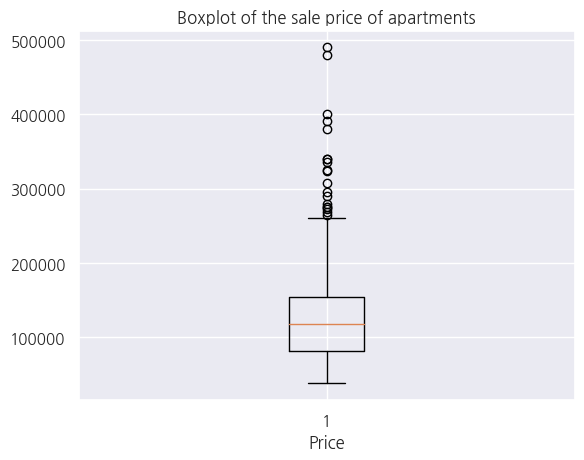

In [87]:
# boxplot으로 시각화해보기

plt.boxplot(df_sale["거래금액"])
plt.xlabel('Price')
plt.title('Boxplot of the sale price of apartments')
plt.show()

In [88]:
#IQR = Q3- Q1 을 이용하여 이상치의 개수를 구해보기
q3 = df_sale["거래금액"].quantile(0.75) 
q1 = df_sale["거래금액"].quantile(0.25)

iqr = q3 - q1
out_cut = iqr * 1.5

# lower , upper bound
lower , upper = q1 - out_cut , q3 + out_cut

out_money1 = df_sale["거래금액"] > upper
out_money2 = df_sale["거래금액"] < lower
count_true = sum(out_money1) + sum(out_money2)

print(f"총 이상치의 개수는 {count_true}개 입니다.")

총 이상치의 개수는 19개 입니다.


# 데이터 분석

## 이상치로 분류될 정도로 분당에서 매매거래금액이 높은 아파트는 어디일까?

In [90]:
# 이상치에 해당되는 행 인덱스 구하기
out_index = df_sale.index[out_money1 == True].tolist()

# 전체 데이터프레임에서 행인덱스를 이용하여 필요한 데이터 추출하기
df_top = df_sale.loc[out_index]

In [91]:
display(pd.DataFrame(df_top["법정동"].value_counts()).T)

,정자동,백현동
법정동,11,8


In [92]:
df_top.groupby(['법정동','아파트']).size().reset_index(name='count')

,법정동,아파트,count
0,백현동,THESHARP판교퍼스트파크,1
1,백현동,백현마을8단지(대림),1
2,백현동,판교알파리움1단지,1
3,백현동,판교알파리움2단지,1
4,백현동,판교푸르지오그랑블,4
5,정자동,미켈란쉐르빌,1
6,정자동,분당파크뷰,7
7,정자동,현대I-PARK1,3


<AxesSubplot:xlabel='법정동', ylabel='count'>

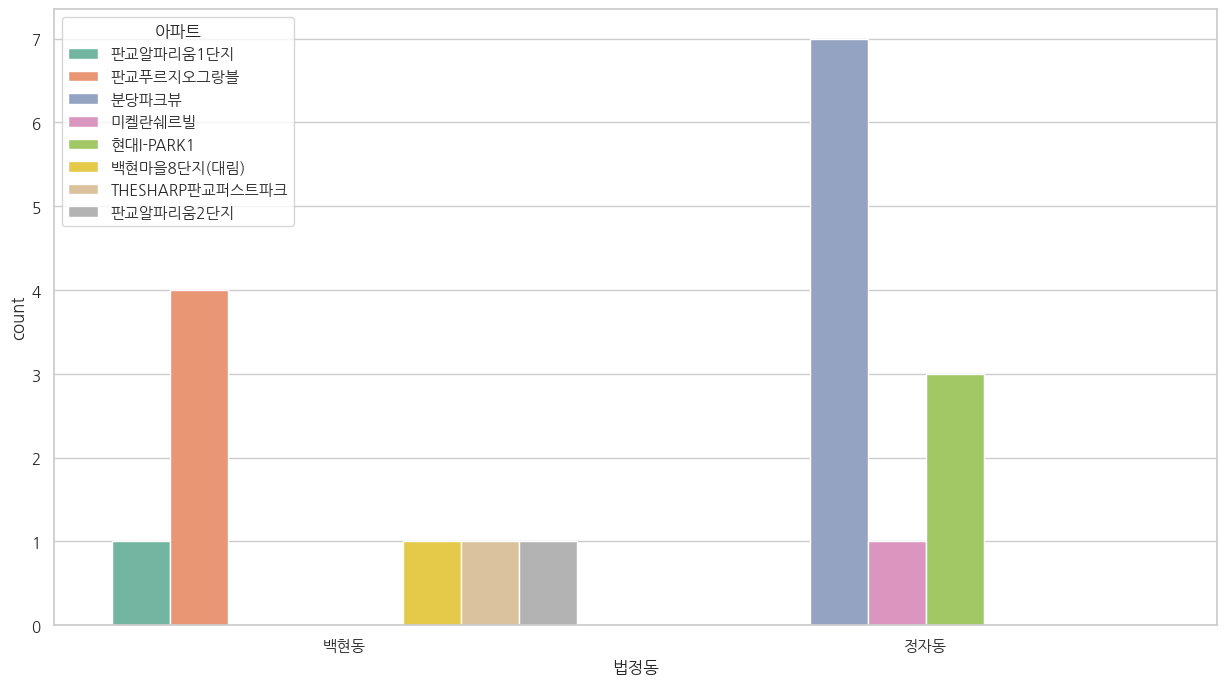

In [93]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
plt.rc('font', family='NanumGothic') 

sns.countplot(data=df_top, x="법정동" , hue='아파트', palette='Set2')

## 상관분석
- 가격에 영향을 미치는 요인들이 무엇이 있을까?

In [98]:
# 매매가격이 높은 아파트 데이터로 상관분석
# 저는 날짜를 뺀 나머지로 실시했습니다.
# 모두 양의 상관관계 : 층수가 높아지거나, 전용면적이 넓어지거나 , 건축년도가 최신일수록 거래금액도 올라가는 경향이 보인다.
df_sale[['건축년도','층','전용면적','거래금액']].corr()

,건축년도,층,전용면적,거래금액
건축년도,1.000000,0.240191,0.214850,0.377153
층,0.240191,1.000000,0.242705,0.342920
전용면적,0.214850,0.242705,1.000000,0.830211
거래금액,0.377153,0.342920,0.830211,1.000000


<AxesSubplot:>

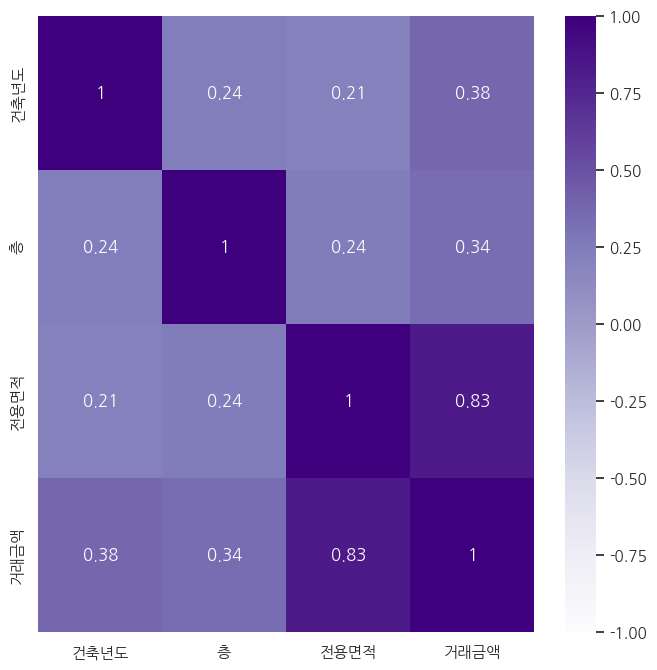

In [100]:
#heatmap으로 상관관계를 표시
plt.rcParams["figure.figsize"] = (8,8)
plt.rc('font', family='NanumGothic') 
sns.heatmap(df_sale[['건축년도','층','전용면적','거래금액']].corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Purples', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

# (추가) 전월세 실거래가

In [101]:
# 2022년 1년동안 경기도 성남시 분당구의 아파트 전월세 데이터를 불러오기
df_rent = api.get_data(
    property_type="아파트",
    trade_type="전월세",
    sigungu_code="41135",
    start_year_month = "202201",
    end_year_month="202212"
    )

## 법정동 기준 아파트 보증금의 중위값 비교

<AxesSubplot:xlabel='법정동', ylabel='보증금액'>

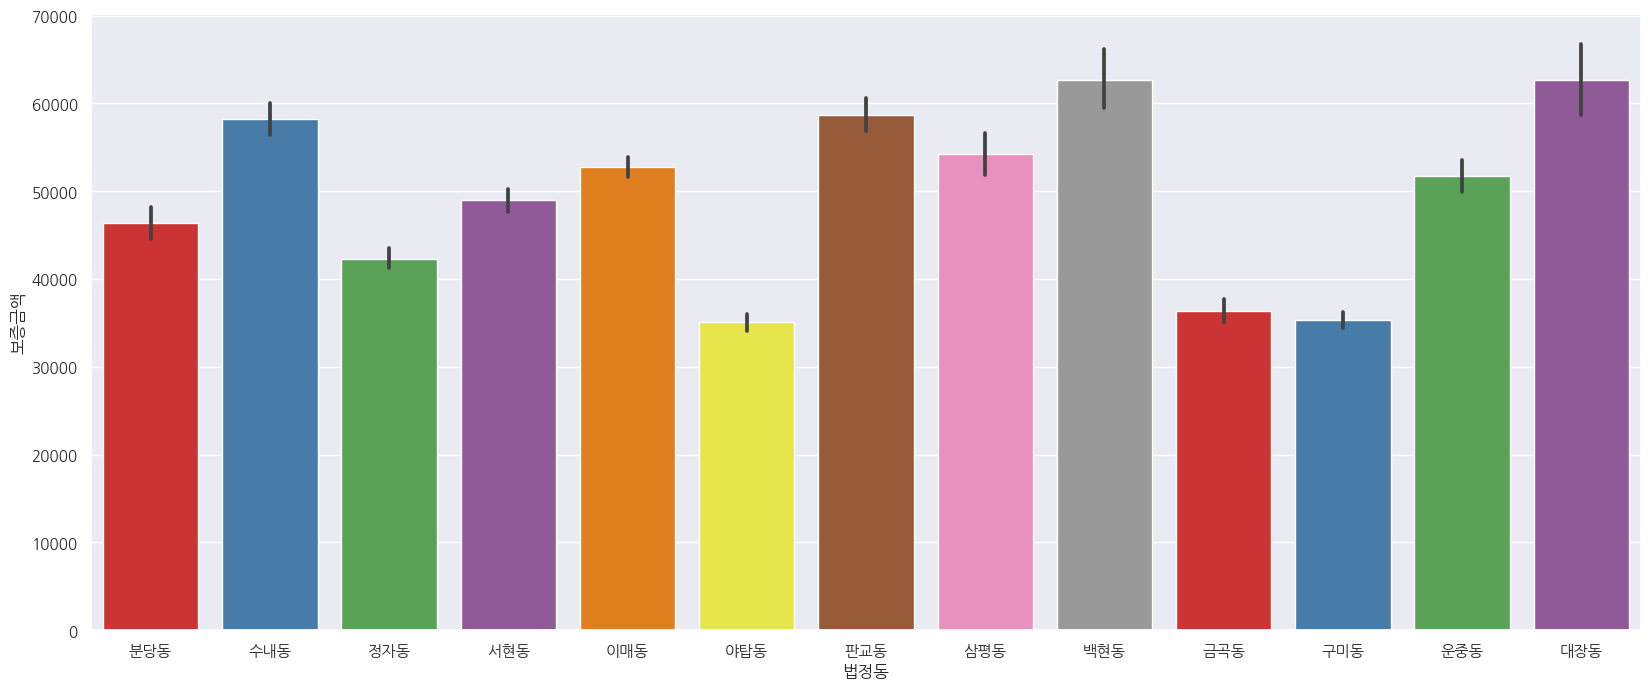

In [103]:
# 법정동 기준 아파트 보증금의 중위값 비교\
plt.figure(figsize=(20,8))
sns.set_style('darkgrid')
plt.rc('font', family='Nanumgothic')

sns.barplot(data=df_rent, x="법정동" , y ='보증금액', palette='Set1')

## 법정동 기준 아파트 월세값의 중위값 비교

<AxesSubplot:xlabel='법정동', ylabel='월세금액'>

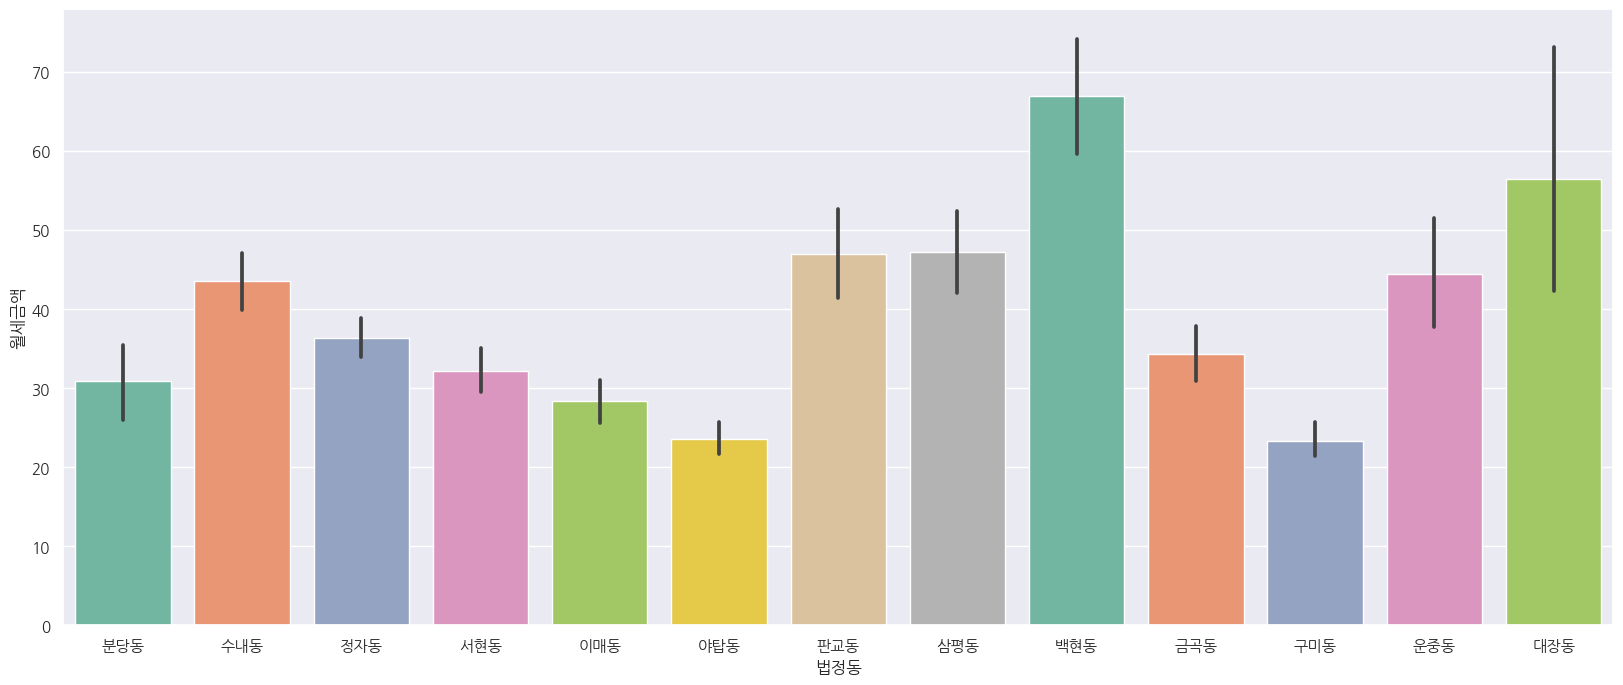

In [105]:
# 법정동 기준 아파트 월세의 중위값 비교 
plt.figure(figsize=(20,8))
sns.set_style('darkgrid')
plt.rc('font', family='Nanumgothic')

sns.barplot(data=df_rent, x="법정동" , y ='월세금액', palette='Set2')

## 이상치로 분류될 정도로 분당에서 보증금이 높은 아파트

In [106]:
#IQR = Q3- Q1 을 이용
q3 = df_rent["보증금액"].quantile(0.75) 
q1 = df_rent["보증금액"].quantile(0.25)

iqr = q3 - q1
out_cut = iqr * 1.5

# lower , upper bound
lower , upper = q1 - out_cut , q3 + out_cut

out_money1 = df_rent["보증금액"] > upper
out_money2 = df_rent["보증금액"] < lower

In [107]:
# 이상치에 해당되는 행 인덱스 구하기
out_index = df_rent.index[out_money1 == True].tolist()
# 전체 데이터프레임에서 행인덱스를 이용하여 필요한 데이터 추출하기
df_deposit = df_rent.loc[out_index]
# 이상치에는 어떤 아파트가 많고 또 어느 동에 많이 위치해 있을까?
display(pd.DataFrame(df_deposit["법정동"].value_counts()).T)

,백현동,정자동,수내동,삼평동,서현동,이매동,판교동
법정동,86,80,27,22,6,1,1


Text(0, 0.5, '')

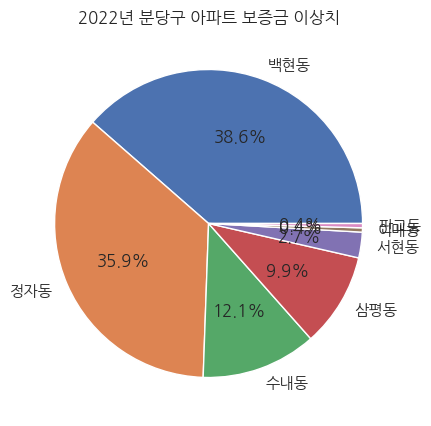

In [109]:
plt.rc('font', family='NanumGothic') 
    
df_deposit['법정동'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(5,5))
plt.title('2022년 분당구 아파트 보증금 이상치')
plt.ylabel('')

## 상관분석
- 월세, 전세금 모두 종전 금액과 높은 상관관계를 보인다.

In [110]:
df_rent[df_deposit.columns.difference(['년','월','일'])].corr()

,건축년도,보증금액,월세금액,전용면적,종전계약보증금,종전계약월세,층
건축년도,1.000000,0.238648,0.159631,0.124129,0.300635,0.265280,0.128492
보증금액,0.238648,1.000000,-0.358681,0.673859,0.972471,-0.121845,0.148805
월세금액,0.159631,-0.358681,1.000000,0.189914,-0.357413,0.926209,0.068406
전용면적,0.124129,0.673859,0.189914,1.000000,0.696797,0.427425,0.159608
종전계약보증금,0.300635,0.972471,-0.357413,0.696797,1.000000,-0.148029,0.138176
종전계약월세,0.265280,-0.121845,0.926209,0.427425,-0.148029,1.000000,0.143800
층,0.128492,0.148805,0.068406,0.159608,0.138176,0.143800,1.000000


<AxesSubplot:>

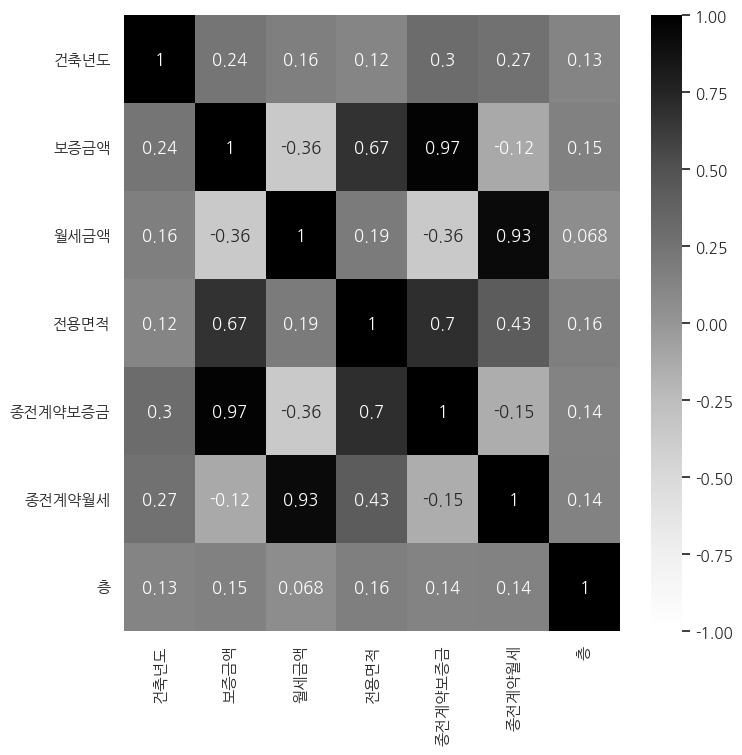

In [117]:
#heatmap으로 상관관계를 표시
plt.rcParams["figure.figsize"] = (8,8)
sns.heatmap(df_rent[df_deposit.columns.difference(['년','월','일'])].corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greys', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )
     